In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from tensorboard.backend.event_processing import event_accumulator

In [2]:
# 10 second bins
bin_size = 10

In [3]:
params = {
    'legend.fontsize': 'large',
    'figure.figsize': (8, 4), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

In [33]:
def plot_dirs(dirs, savepath=''):

    plt.figure()

    for sketch_name, color, directory in dirs:
        time_loss_dict = [[] for i in range(50)]

        for file in os.listdir(directory)[:15]:
            path = os.path.join(directory, file)
            ea = event_accumulator.EventAccumulator(path,
                size_guidance={ # see below regarding this argument
                event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                event_accumulator.IMAGES: 4,
                event_accumulator.AUDIO: 4,
                event_accumulator.SCALARS: 0,
                event_accumulator.HISTOGRAMS: 1,
            })

            ea.Reload()

            times = pd.DataFrame(ea.Scalars('training_time'))['value'].values[:50] // bin_size
            losses = pd.DataFrame(ea.Scalars('test_error'))['value'].values[:50]

            for i in range(len(times)):
    #             print(int(times[i]), losses[i])
                time_loss_dict[int(times[i])].append(losses[i])

    #     print(time_loss_dict)
    #     break

        times = []
        means = []
        stds = []
        for i, entry in enumerate(time_loss_dict):
            if len(entry) > 0:
    #             print(i, len(entry))
                times.append(i*bin_size)
                means.append(np.array(entry).mean())
                stds.append(np.array(entry).std())


    #     print(times)
    #     print(means)
        plt.fill_between(times, np.array(means)-np.array(stds), np.array(means)+np.array(stds), alpha=0.2, color=color)
        plt.plot(times, np.array(means), label=sketch_name, color=color, linewidth=3)
        print(sketch_name, times, np.array(means))

    plt.legend()
    plt.ylim(0,0.1)
    plt.xlim(0,250)
    plt.xlabel('Training Time [seconds]')
    plt.ylabel('Test Error')
    plt.tight_layout()
    
    if len(savepath) > 0:
        plt.savefig(savepath, dpi=300)
    # plt.xscale('log')
#     plt.yscale('log')
    plt.show()

In [34]:
colors = plt.get_cmap('tab20c')(np.linspace(0, 0.8, 16))[::2]
colors = np.flip(colors, axis=0)

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250] [0.28200714 0.05359167 0.04021471 0.03390833 0.03104412 0.02912222
 0.02822222 0.02774359 0.02738235 0.02693611 0.02703824 0.02682308
 0.0266     0.0256     0.0258     0.02535    0.0249     0.02485
 0.0247     0.0248     0.02475    0.0244     0.02445    0.02455
 0.0246     0.0245    ]
SRF [0, 10, 20, 30, 40, 50, 60, 70, 80] [0.32224717 0.0873     0.06637647 0.05725534 0.05151579 0.04900833
 0.05262    0.04985    0.04723   ]
ProductSRHT [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150] [0.32267097 0.06443279 0.05252131 0.04735574 0.04446885 0.04278597
 0.04195532 0.04228667 0.04566667 0.0444     0.04313333 0.04276667
 0.04255    0.04173333 0.042      0.0415    ]
CtR-ProductSRHT [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190] [0.3008549  0.06274091 0.04806977 0.04260465 0.03867442 0.03661136
 0.0

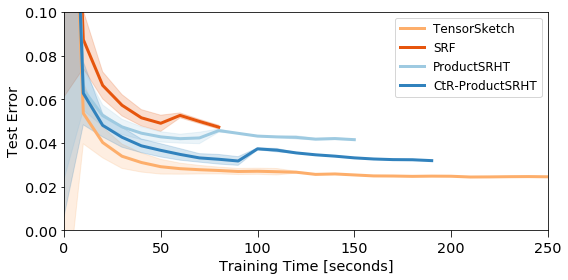

In [35]:
dirs_p7_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_7_comprealFalse_2_lr_0.001_epochs_50'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_7_comprealFalse_2_lr_0.001_epochs_150'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_7_comprealFalse_2_lr_0.001_epochs_150'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_7_comprealTrue_2_lr_0.001_epochs_150')
]

plot_dirs(dirs_p7_10k_tune, savepath='')

In [27]:
dirs_p7_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/d10k/p7/ts'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/d10k/p7/srf'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/d10k/p7/srht'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/d10k/p7/srht_comp_real')
]

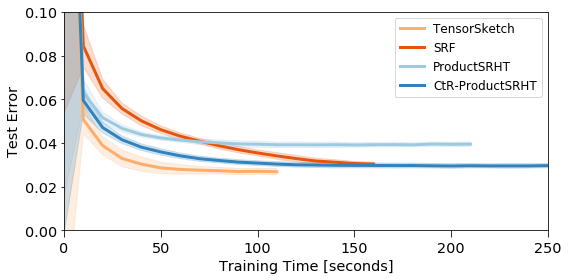

In [28]:
plot_dirs(dirs_p7_10k_tune, savepath='')

In [99]:
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/d10k/ts'),
    ('TensorSRHT', colors[6], '../tensorboard_logs/mnist_tune/d10k/srht'),
    ('CtR-TensorSRHT', colors[7], '../tensorboard_logs/mnist_tune/d10k/srht_comp_real')
]

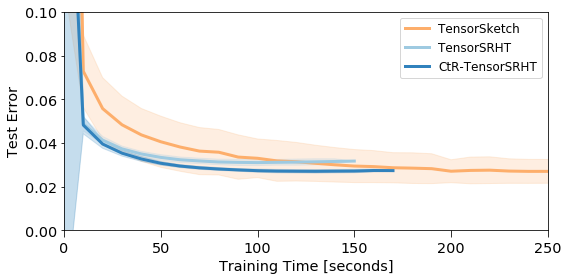

In [100]:
plot_dirs(dirs_p6_10k_tune, savepath='../figures/vi_gp_convergence.pdf')

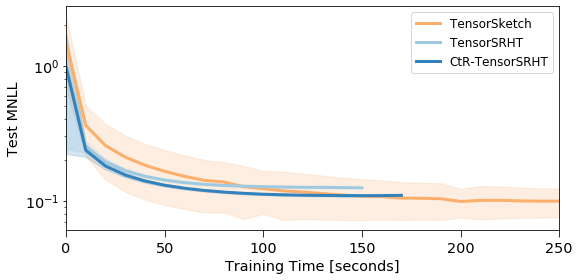

In [118]:
plot_dirs(dirs_p6_10k_tune, savepath='../figures/vi_gp_convergence_train.pdf')